# Assignment 3
Solve the 2D wave equation for eigenmodes and eigenfrequencies of membranes (square, rectangle, circle) with fixed boundaries. Discretize, compute eigenvalues, analyze frequency dependence on size, and visualize time evolution. Also, solve the steady-state diffusion equation on a circular domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from src.config import *

----
## 3.1 Eigenmodus of drums or membranes of different shapes
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: Tycho Stam_

In [2]:
from src.grid_discretization import (
    initialize_grid_vector,
    initialize_tridiagonal_matrix,
)
from src.matrix_solver import solve_eigenvalues
from script.create_plot import create_seaborn_heatmap, plot_eigenmodus

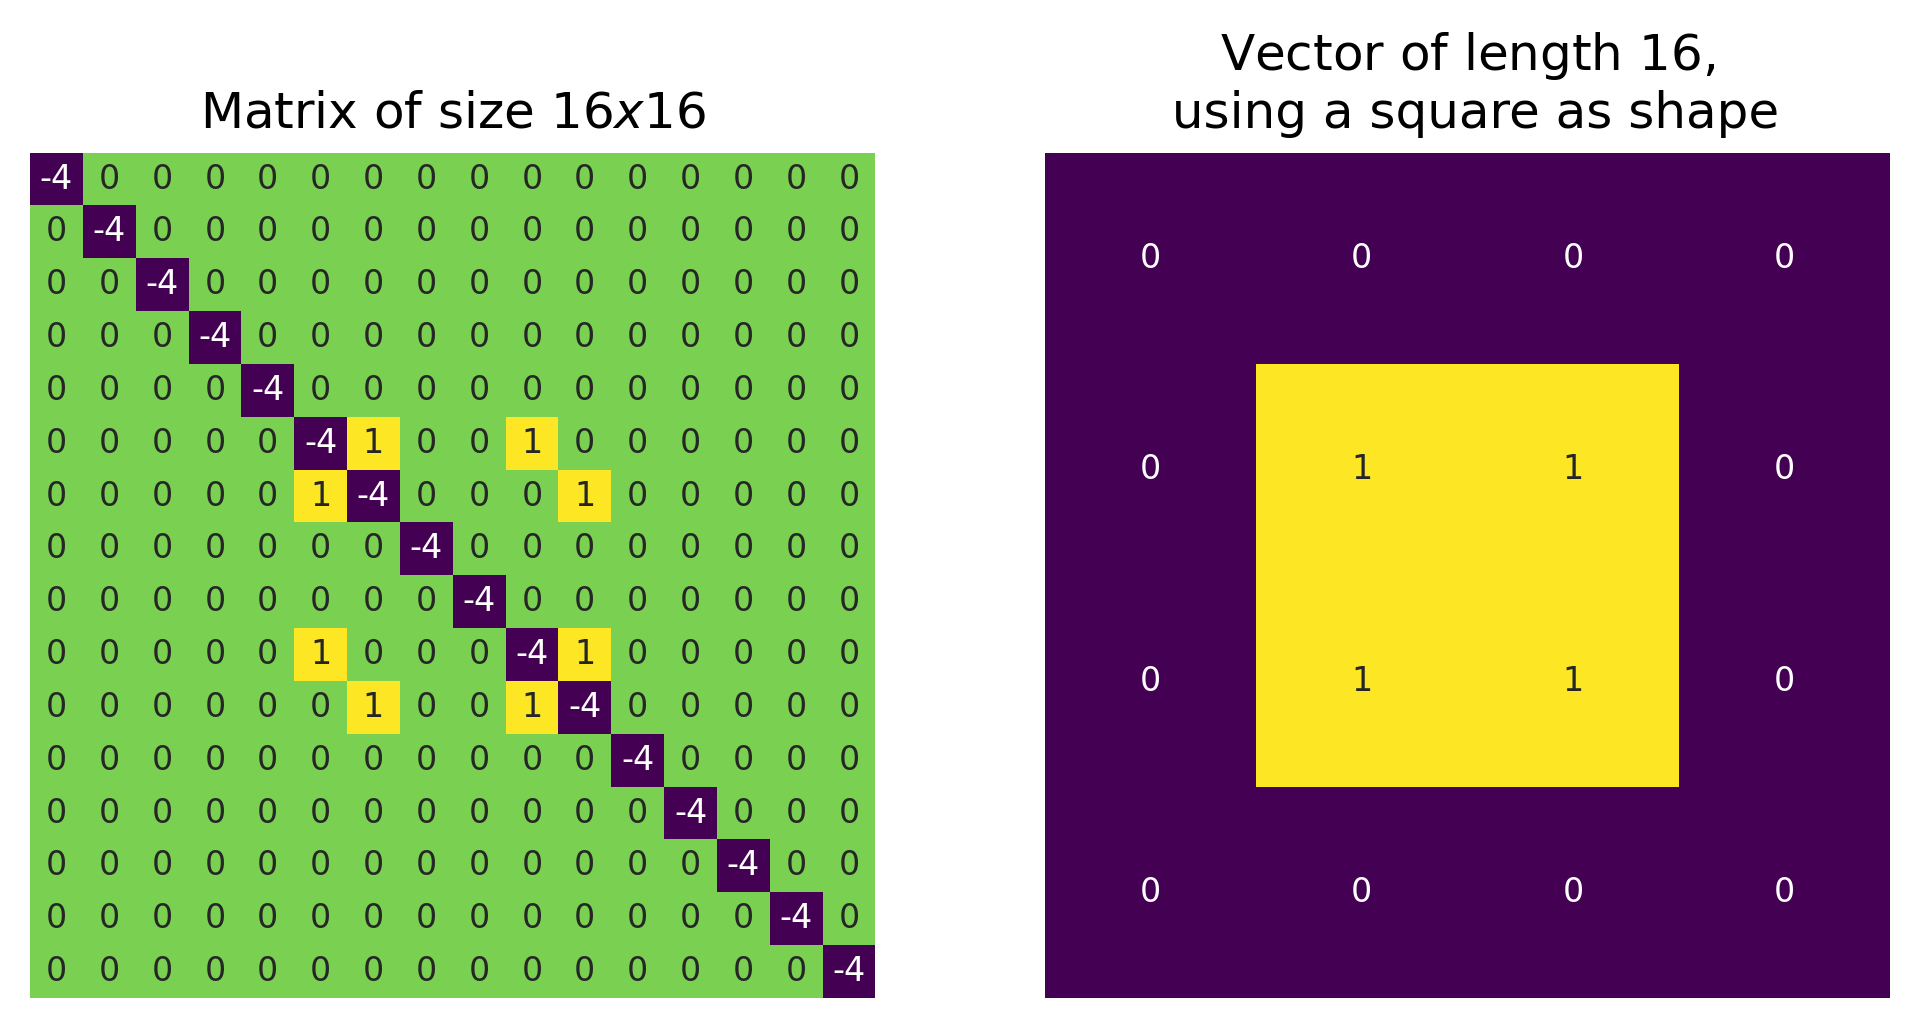

In [3]:
N, L = 4, 2
shape = "square"

v = initialize_grid_vector(N, L, shape=shape)
M = initialize_tridiagonal_matrix(v)

_, ax = plt.subplots(1, 2, figsize=(FIG_SIZE), dpi=FIG_DPI)

create_seaborn_heatmap(M.toarray(), ax[0])
ax[0].set_title(f"Matrix of size ${N**2} x {N**2}$")

create_seaborn_heatmap(v.reshape(N, N), ax[1])
ax[1].set_title(f"Vector of length ${N**2}$,\n using a {shape} as shape")

plt.show()

<!-- TODO explain this -->
Figure

In [4]:
dx = 0.01
N = 55

v = initialize_grid_vector(N, L, shape=shape)

In [5]:
%%time
M = initialize_tridiagonal_matrix(vector=v, sparse=False)

M = M * dx**2
frequencies, eigenvectors = solve_eigenvalues(M, model="h")

Time taken to solve the eigenvalues: 3.01 seconds
CPU times: user 17.5 s, sys: 341 ms, total: 17.8 s
Wall time: 3.31 s


In [6]:
%%time
M = initialize_tridiagonal_matrix(vector=v, sparse=True)

M = M * dx**2
frequencies, eigenvectors = solve_eigenvalues(M, model="h")

Time taken to solve the eigenvalues: 0.01 seconds using sparse solver
CPU times: user 736 ms, sys: 201 ms, total: 937 ms
Wall time: 374 ms


In [7]:
def plot_shape(shape: str) -> None:
    """
    Plot the eigenmodes of a given shape.

    Params
    ----------
    - shape (str): The shape of the grid.
    """
    L = N - 10
    v = initialize_grid_vector(N, L, shape=shape)

    M = initialize_tridiagonal_matrix(vector=v, sparse=True)
    M = M * dx**2
    frequencies, eigenvectors = solve_eigenvalues(M, model="h")

    plot_eigenmodus(PLOTS_AMOUNT, N, L, frequencies, eigenvectors, shape, save_img=True)

In [8]:
plot_shape("square")

Time taken to solve the eigenvalues: 0.20 seconds using sparse solver


In [9]:
plot_shape("rectangle")

Time taken to solve the eigenvalues: 0.11 seconds using sparse solver


In [10]:
plot_shape("circle")

Time taken to solve the eigenvalues: 0.16 seconds using sparse solver


-----
# 3.2 Direct methods for solving the steady state problems
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: [Name]_

In [11]:
# LOCAL IMPORTS

In [12]:
# SOME CODE

In [13]:
# SOME CODE

-----
# 3.3 The leapfrog method - efficient time integration
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: [Name]_

In [14]:
# LOCAL IMPORT

In [15]:
# SOME CODE

In [16]:
# SOME CODE